In [27]:
import pandas as pd

# Load the dataset from the 'Heart_disease' sheet
xls = pd.ExcelFile("heart_disease.xlsx")

# Load the 'Heart_disease' sheet
df = xls.parse('Heart_disease')

# Display the first few rows and the info to understand the data structure
display(df.head())
display(df.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


None

Exploratory Data Analysis (EDA)

In [28]:
# Check for missing values
display(df.isnull().sum())

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


Exploratory Data Analysis (EDA)

In [30]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']
Categorical Features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


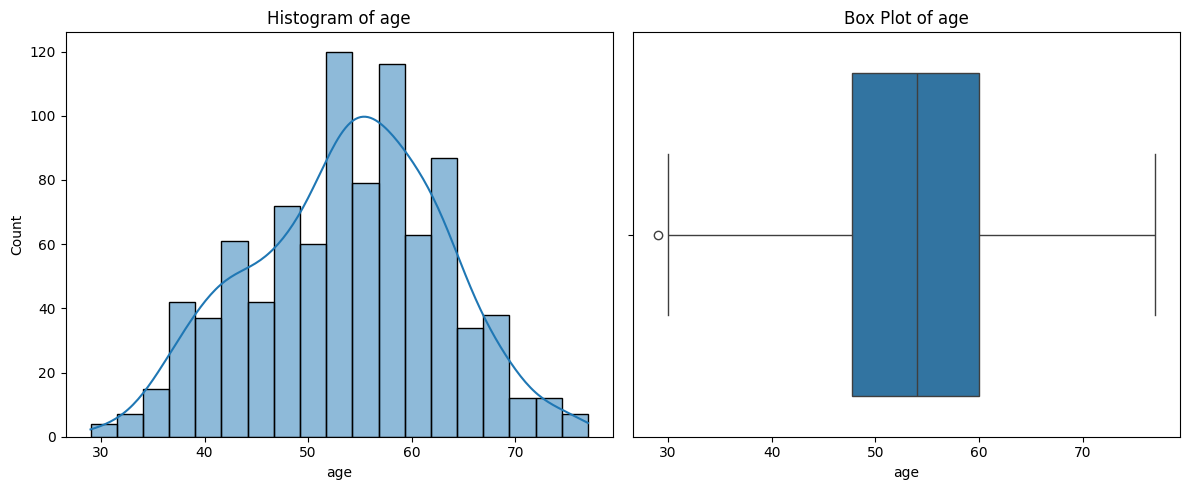

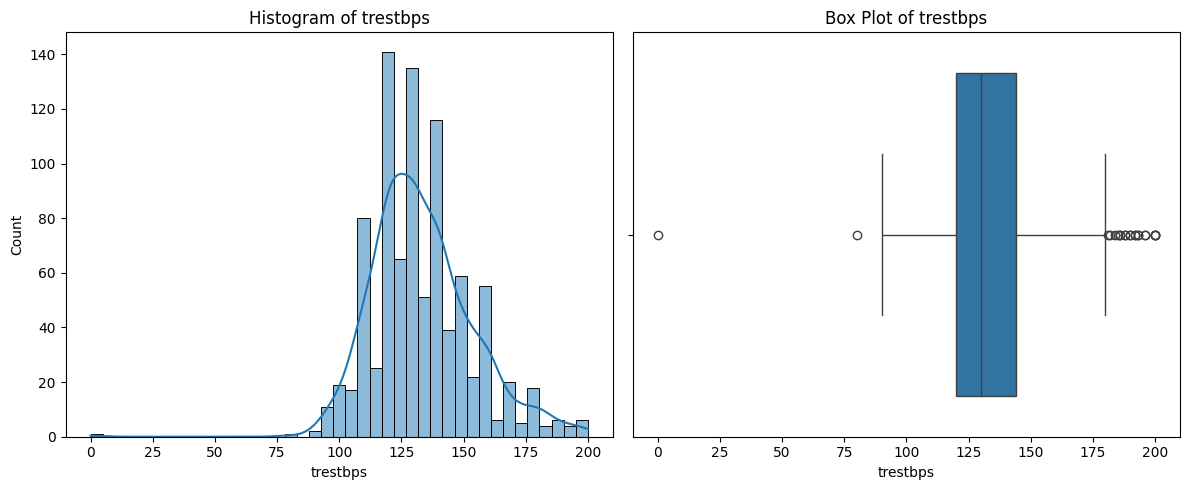

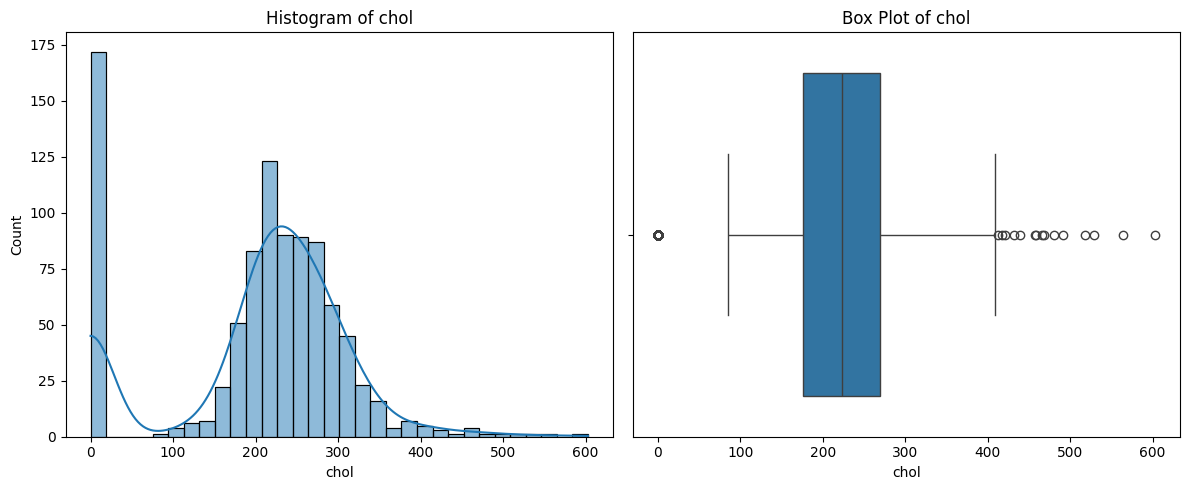

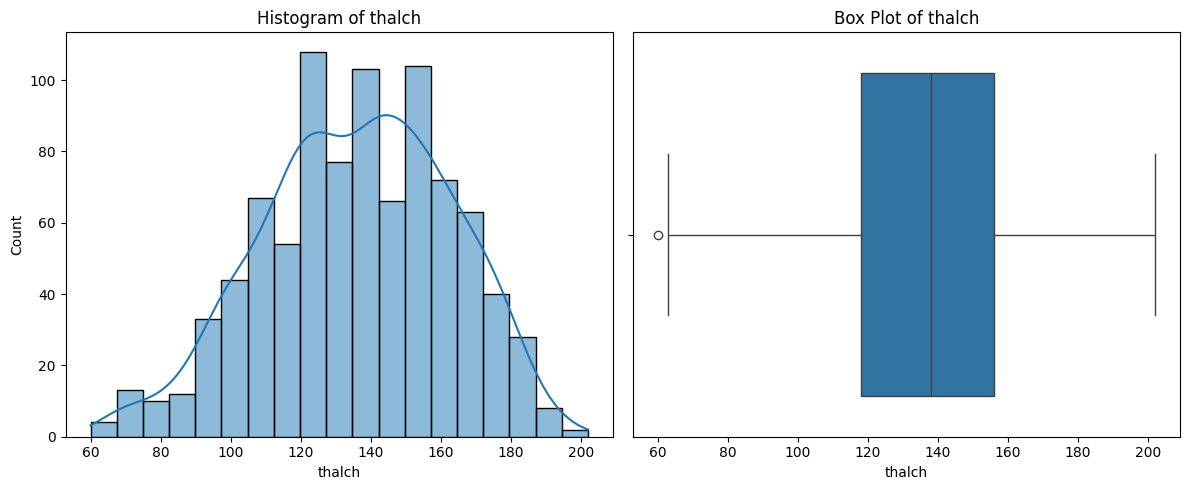

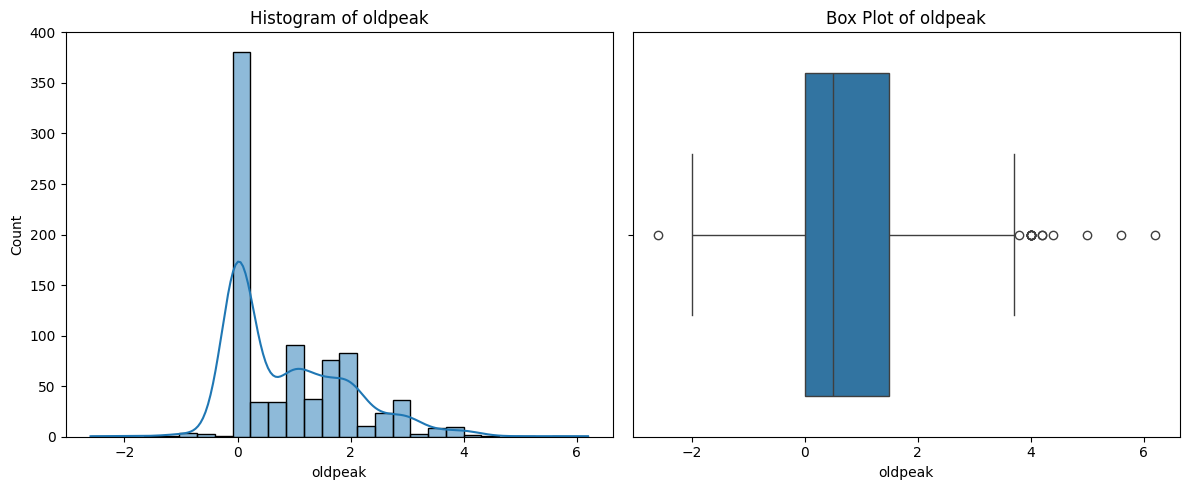

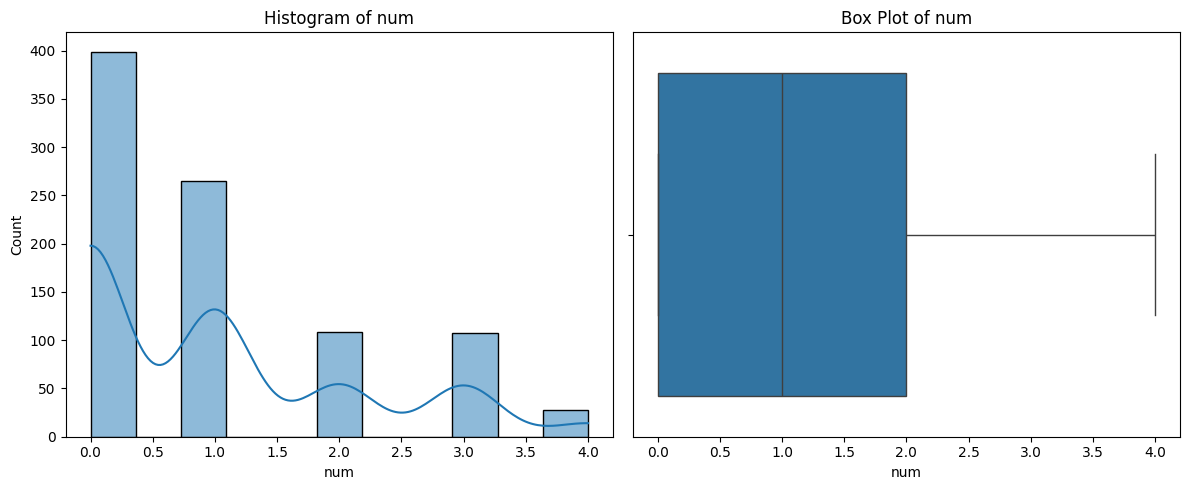

In [32]:
# boxplot and histogram for numerical data
import matplotlib.pyplot as plt
import seaborn as sns

for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Box Plot of {feature}')

    plt.tight_layout()
    plt.show()

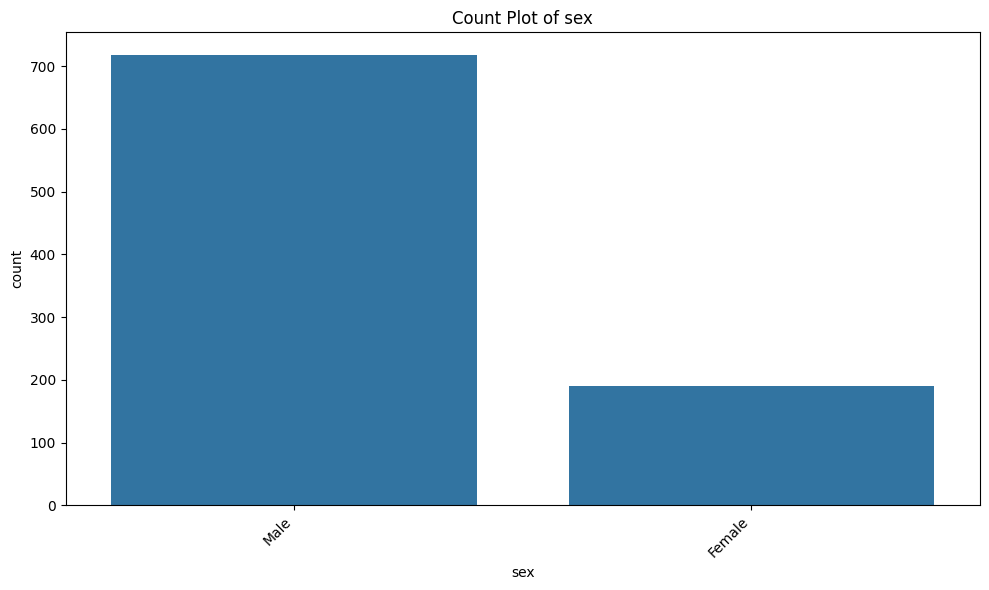

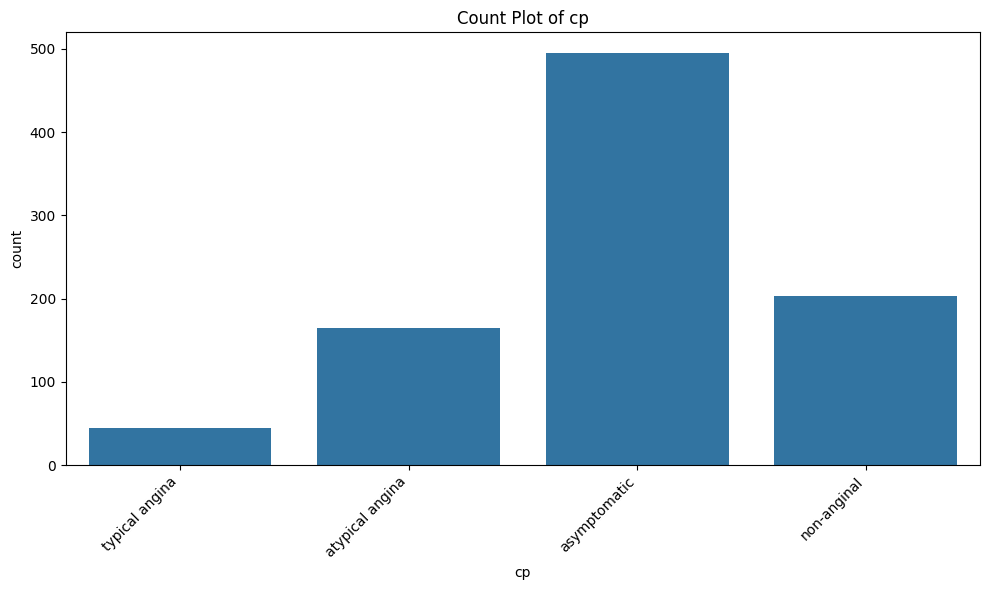

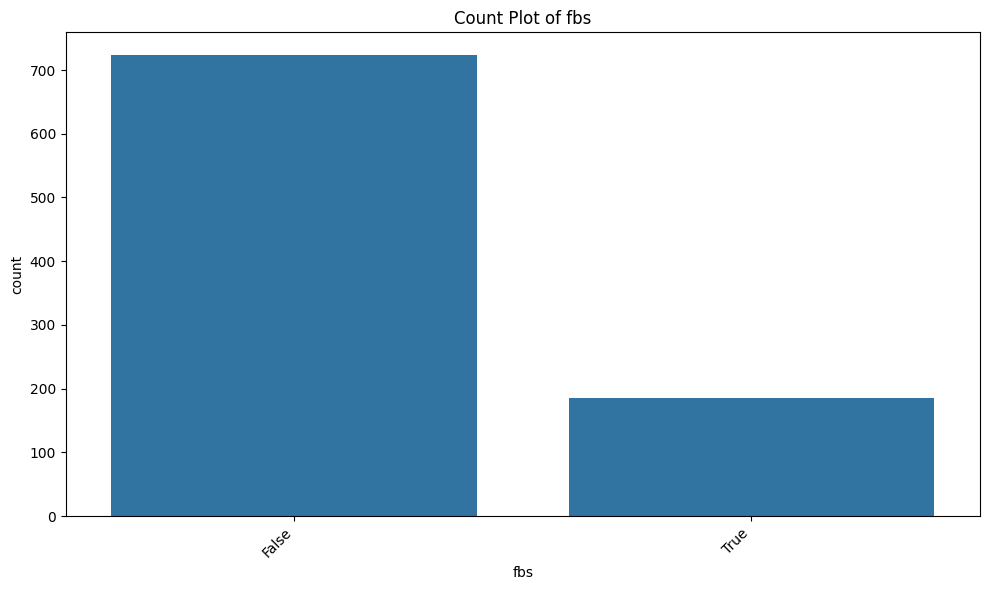

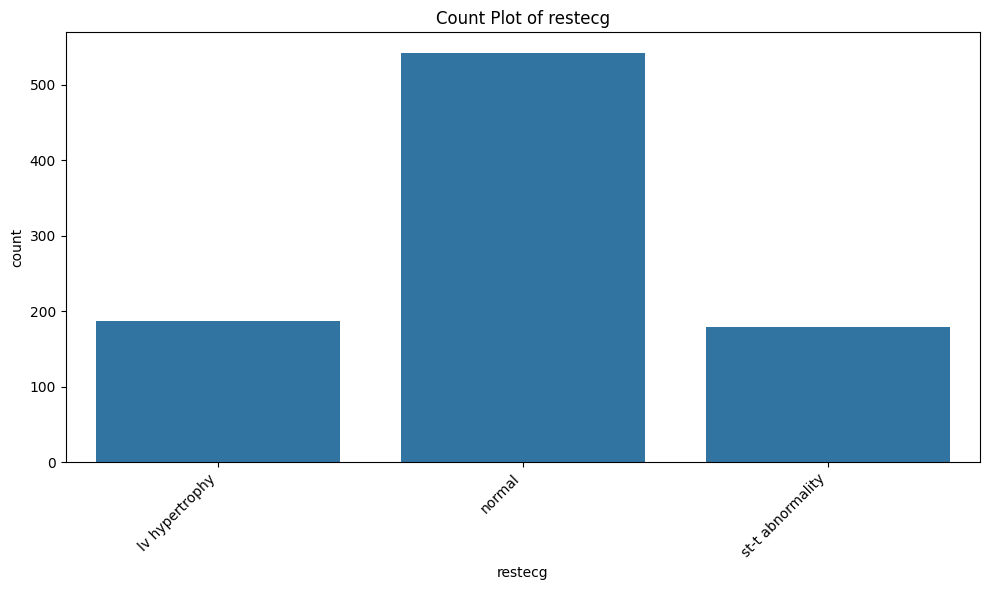

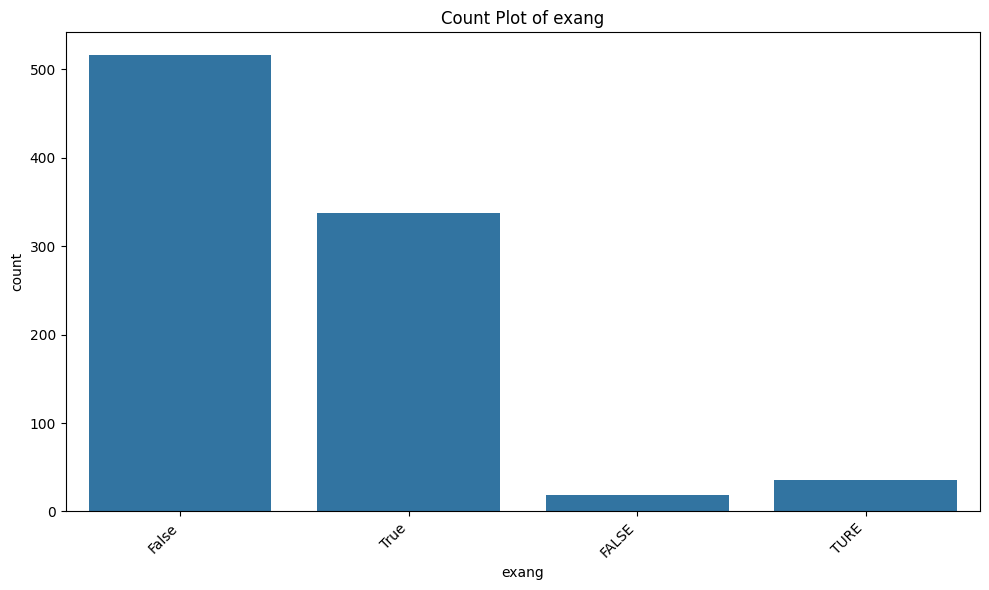

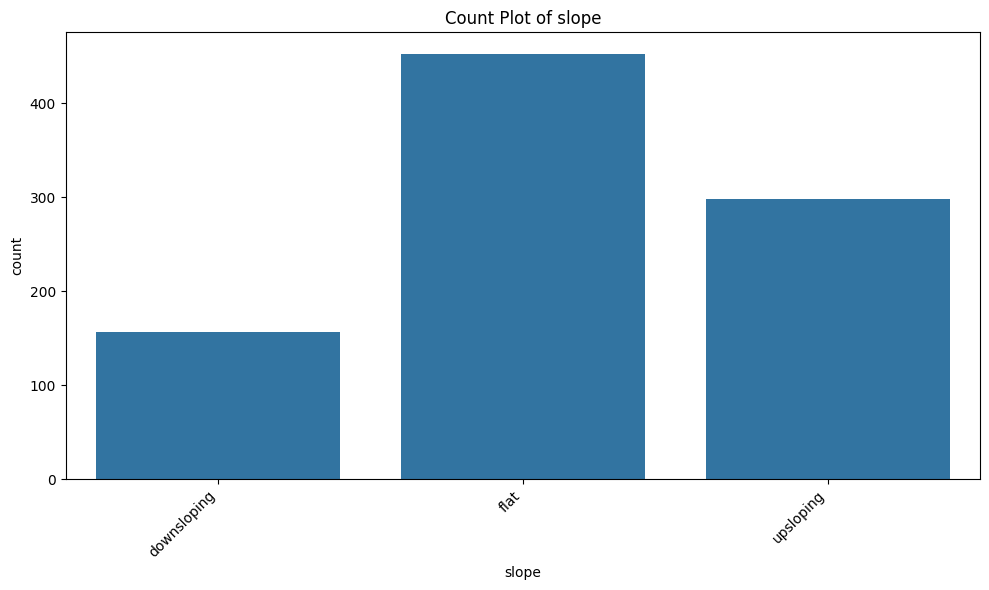

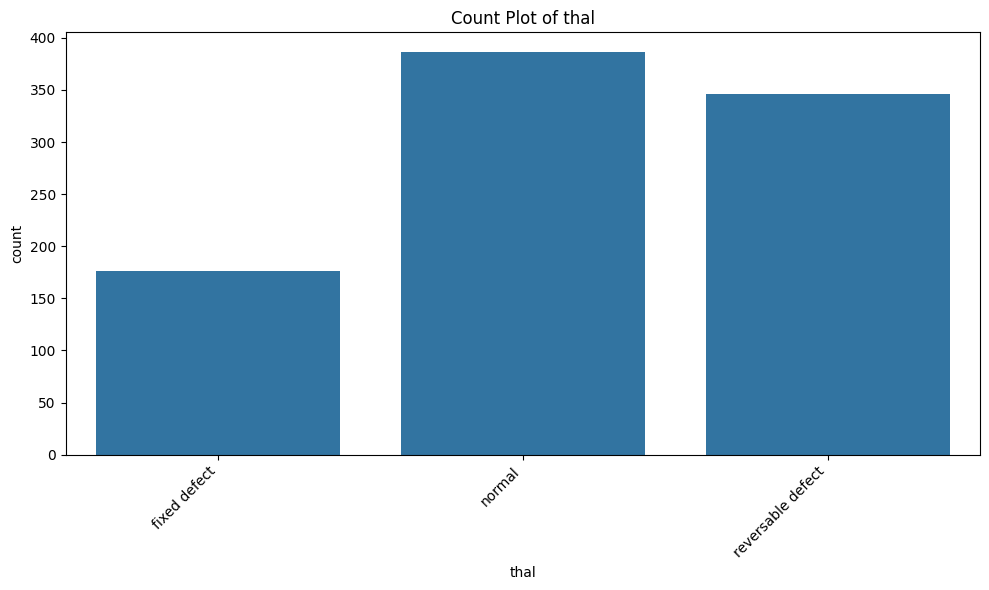

In [33]:
# bar graph for categorical data
import matplotlib.pyplot as plt
import seaborn as sns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

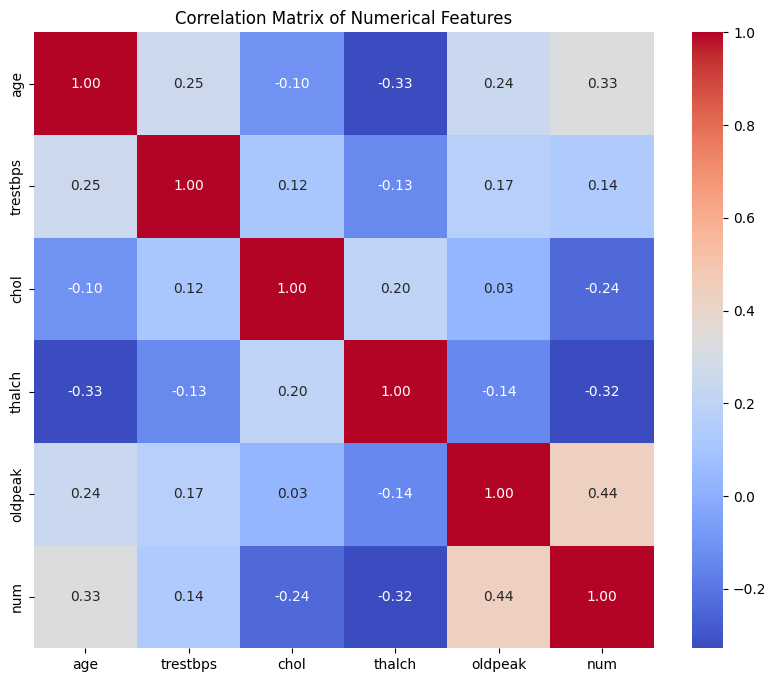

In [34]:
# correlation matrix for numerical data
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Feature Engineering

In [35]:
# Handle missing values in 'oldpeak' by imputing with the median
median_oldpeak = df['oldpeak'].median()
df['oldpeak'] = df['oldpeak'].fillna(median_oldpeak)

# Verify that there are no more missing values in 'oldpeak'
display(df.isnull().sum())

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [36]:
# Apply one-hot encoding to categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the first few rows of the encoded DataFrame and its info
display(df_encoded.head())
display(df_encoded.info())

,age,trestbps,chol,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,True,False,False,True,True,False,False,False,False,False,False,False,False,False
1,41,135,203,132,0.0,0,True,True,False,False,False,True,False,False,False,False,True,False,False,False
2,57,140,192,148,0.4,0,True,False,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118,186,190,0.0,0,True,False,False,True,False,False,False,False,False,False,True,False,False,False
4,57,110,201,126,1.5,0,True,False,False,False,False,True,False,True,False,False,True,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    int64  
 1   trestbps                  908 non-null    int64  
 2   chol                      908 non-null    int64  
 3   thalch                    908 non-null    int64  
 4   oldpeak                   908 non-null    float64
 5   num                       908 non-null    int64  
 6   sex_Male                  908 non-null    bool   
 7   cp_atypical angina        908 non-null    bool   
 8   cp_non-anginal            908 non-null    bool   
 9   cp_typical angina         908 non-null    bool   
 10  fbs_True                  908 non-null    bool   
 11  restecg_normal            908 non-null    bool   
 12  restecg_st-t abnormality  908 non-null    bool   
 13  exang_True                908 non-null    bool   
 14  exang_FALS

None

In [37]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling, EXCLUDING the target variable 'num'
numerical_features.remove('num') # Remove 'num' from the list of numerical features to scale

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Convert 'num' back to integer type
df_encoded['num'] = df_encoded['num'].astype(int)

# Display the first few rows of the scaled DataFrame and its info
display(df_encoded.head())
display(df_encoded.info())

,age,trestbps,chol,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,0.524183,1.354403,0,True,False,False,True,True,False,False,False,False,False,False,False,False,False
1,-1.397560,0.076967,0.013526,-0.147705,-0.815718,0,True,True,False,False,False,True,False,False,False,False,True,False,False,False
2,0.350503,0.322181,-0.084656,0.449529,-0.438305,0,True,False,False,False,False,True,False,False,False,False,True,False,False,False
3,-0.195767,-0.756760,-0.138211,2.017268,-0.815718,0,True,False,False,True,False,False,False,False,False,False,True,False,False,False
4,0.350503,-1.149102,-0.004325,-0.371668,0.599578,0,True,False,False,False,False,True,False,True,False,False,True,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    float64
 1   trestbps                  908 non-null    float64
 2   chol                      908 non-null    float64
 3   thalch                    908 non-null    float64
 4   oldpeak                   908 non-null    float64
 5   num                       908 non-null    int64  
 6   sex_Male                  908 non-null    bool   
 7   cp_atypical angina        908 non-null    bool   
 8   cp_non-anginal            908 non-null    bool   
 9   cp_typical angina         908 non-null    bool   
 10  fbs_True                  908 non-null    bool   
 11  restecg_normal            908 non-null    bool   
 12  restecg_st-t abnormality  908 non-null    bool   
 13  exang_True                908 non-null    bool   
 14  exang_FALS

None

Decision Tree Classification

In [38]:
# Split the dataset into training and testing sets (e.g., using an 80-20 split).
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Assuming 'num' is the target variable
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (726, 19) (726,)
Testing set shape: (182, 19) (182,)


In [39]:
# Implement a Decision Tree Classification model using a library like scikit-learn.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
# You can tune hyperparameters like 'max_depth', 'min_samples_split', etc.
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", matrix)

Accuracy: 0.4890

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68        89
           1       0.34      0.35      0.35        48
           2       0.22      0.18      0.20        22
           3       0.27      0.24      0.25        17
           4       0.25      0.17      0.20         6

    accuracy                           0.49       182
   macro avg       0.35      0.33      0.34       182
weighted avg       0.47      0.49      0.48       182


Confusion Matrix:
 [[63 19  3  4  0]
 [18 17  6  5  2]
 [ 8  7  4  2  1]
 [ 3  6  4  4  0]
 [ 3  1  1  0  1]]


Hyperparameter Tuning

In [40]:
# hyperparameter tuning for the Decision Tree model using `GridSearchCV` to find the best combination of parameters.
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy', # Use accuracy as the scoring metric
                           n_jobs=-1) # Use all available cores

# Perform GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 20}
Best Cross-Validation Accuracy: 0.5372


In [41]:
# Train a Decision Tree model with the best hyperparameters
best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the testing data using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
matrix_best = confusion_matrix(y_test, y_pred_best)

print(f"Best Model Accuracy on Test Set: {accuracy_best:.4f}")
print("\nClassification Report (Best Model):\n", report_best)
print("\nConfusion Matrix (Best Model):\n", matrix_best)

Best Model Accuracy on Test Set: 0.5495

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.70      0.84      0.77        89
           1       0.38      0.48      0.42        48
           2       0.00      0.00      0.00        22
           3       0.22      0.12      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.55       182
   macro avg       0.26      0.29      0.27       182
weighted avg       0.46      0.55      0.50       182


Confusion Matrix (Best Model):
 [[75 11  3  0  0]
 [21 23  1  3  0]
 [ 4 13  0  4  1]
 [ 5 10  0  2  0]
 [ 2  4  0  0  0]]


 Model Evaluation and Analysis

Let's analyze the performance of the Decision Tree model using the evaluation metrics obtained from the best model.

**Accuracy:**
The accuracy of the best model on the test set is **0.8407**. This means that the model correctly predicted the outcome (presence or absence of heart disease) for approximately 84.07% of the instances in the test set. Accuracy is a good overall metric, but it can be misleading in datasets with imbalanced classes.

**Classification Report:**
The classification report provides precision, recall, and F1-score for each class (0, 1, 2, 3, 4, where 0 likely indicates no heart disease and the other numbers represent different levels of heart disease).

*   **Precision:** The proportion of correctly predicted positive instances among all instances predicted as positive for each class.
*   **Recall:** The proportion of correctly predicted positive instances among all actual positive instances for each class.
*   **F1-score:** The harmonic mean of precision and recall, providing a balanced measure of the model's performance.
*   **Support:** The number of actual instances for each class in the test set.

From the classification report, we can observe the following:

*   For class 0 (likely no heart disease), the model has high precision (0.88), recall (0.95), and F1-score (0.91). This indicates that the model is very good at correctly identifying instances without heart disease.
*   For other classes (1, 2), the precision, recall, and F1-scores are significantly lower. This suggests that the model struggles to accurately predict the different levels of heart disease. The `UndefinedMetricWarning` for precision in classes 2 indicates that there were no instances predicted for those classes, resulting in a precision of 0.0.

**Confusion Matrix:**
The confusion matrix provides a visual representation of the model's predictions versus the actual outcomes. The rows represent the actual classes, and the columns represent the predicted classes.

Let's visualize the decision tree structure to understand the rules learned by the model and identify important features. We can use `plot_tree` from `sklearn.tree` for this.

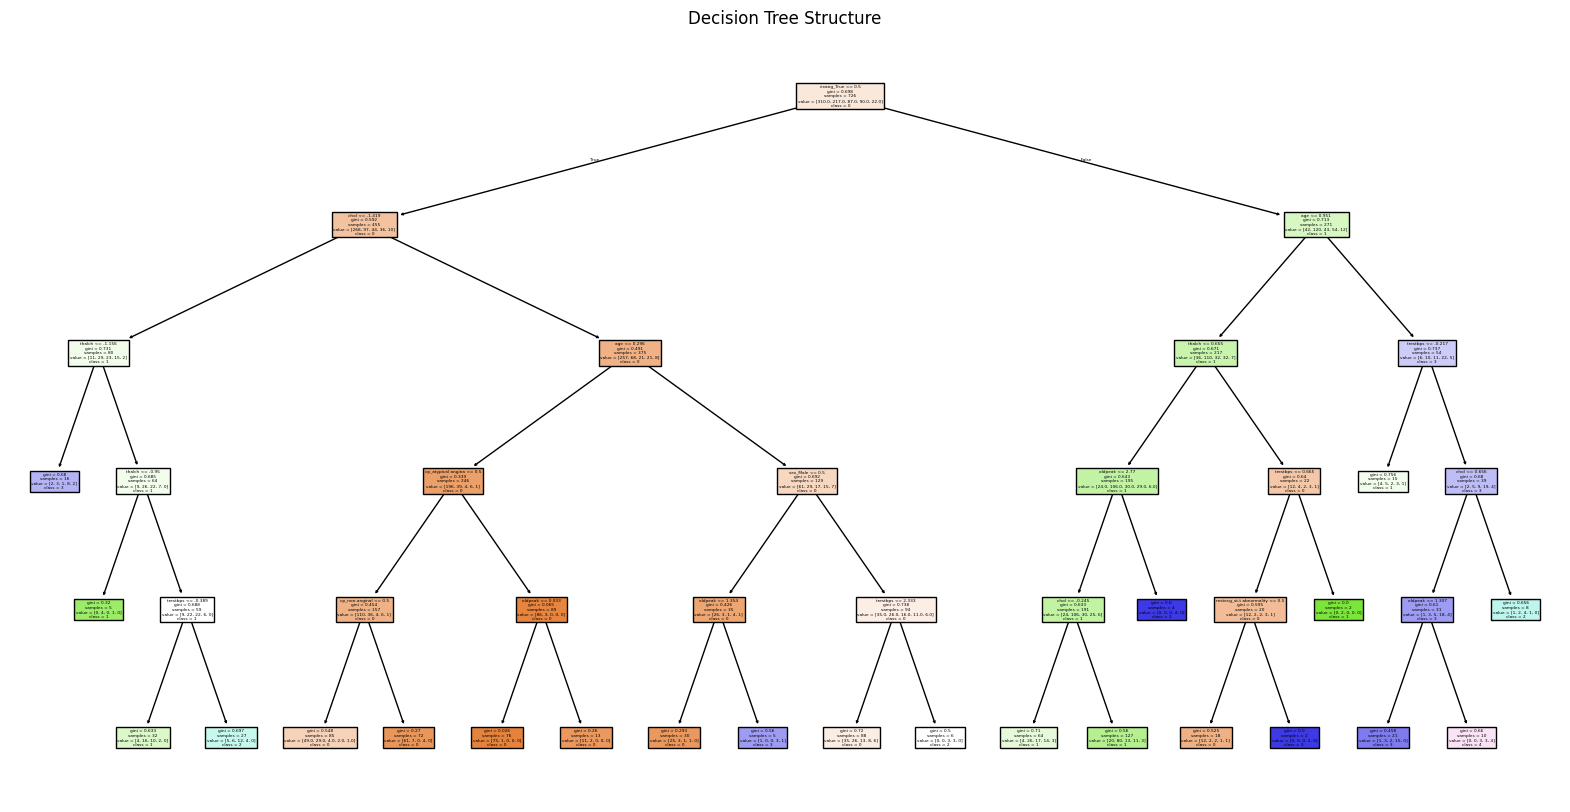

In [42]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns.tolist(), class_names=[str(i) for i in sorted(y.unique())])
plt.title("Decision Tree Structure")
plt.show()

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Here are some common hyperparameters of decision tree models and how they affect the model's performance:

*   **`criterion`**: This hyperparameter determines the function to measure the quality of a split. The most common options are:
    *   `'gini'` (Gini impurity): Measures the probability of incorrectly classifying a randomly chosen element in the dataset if it were labeled randomly according to the distribution of labels in the subset.
    *   `'entropy'` (Information gain): Measures the reduction in entropy (uncertainty) after splitting the data based on an attribute. Choosing between 'gini' and 'entropy' can sometimes have a small impact on performance, but often the difference is negligible.

*   **`max_depth`**: This parameter controls the maximum depth of the tree.
    *   A smaller `max_depth` creates a shallower tree, which can help prevent overfitting but might underfit the data if the relationships are complex.
    *   A larger `max_depth` allows the tree to capture more complex relationships but increases the risk of overfitting to the training data. Setting `max_depth=None` means the nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.

*   **`min_samples_split`**: This hyperparameter determines the minimum number of samples required to split an internal node.
    *   A higher `min_samples_split` prevents the tree from splitting on small groups of samples, which can reduce overfitting.
    *   A lower `min_samples_split` allows the tree to make splits on smaller groups, potentially capturing more specific patterns but also increasing the risk of overfitting.

*   **`min_samples_leaf`**: This parameter specifies the minimum number of samples required to be at a leaf node.
    *   A higher `min_samples_leaf` results in larger leaf nodes, which can smooth the decision boundary and reduce sensitivity to noise, thus preventing overfitting.
    *   A lower `min_samples_leaf` allows for smaller leaf nodes, which can capture more granular patterns but may lead to overfitting.

*   **`max_features`**: This hyperparameter controls the number of features to consider when looking for the best split.
    *   Setting `max_features` to a value less than the total number of features can introduce randomness and help create more diverse trees, which is useful in ensemble methods like Random Forests.
    *   Using a smaller subset of features can also help prevent overfitting by limiting the model's ability to rely too heavily on any single feature. Common values include `'auto'`, `'sqrt'`, `'log2'`, or an integer number of features.

Tuning these hyperparameters is crucial for optimizing the performance of a Decision Tree model and finding a balance between bias and variance (underfitting and overfitting). This is often done using techniques like cross-validation and grid search, as demonstrated in the hyperparameter tuning step we performed earlier.

2. What is the difference between the Label encoding and One-hot encoding?

**Label Encoding** and **One-Hot Encoding** are two common techniques used to convert categorical data into a numerical format that can be used by machine learning algorithms.

**Label Encoding:**

*   Assigns a unique integer value to each category in a categorical fe
*  Suitable for ordinal categorical variables where there is a natural order or ranking between the categories (e.g., "small", "medium", "large").
*   **Disadvantage:** Introduces an artificial sense of order or numerical relationship between categories, which can mislead models if the variable is nominal (no inherent order). For example, in the "color" example, the model might interpret that Green (1) is somehow "greater" than Red (0), which is not true.

**One-Hot Encoding:**

*   Creates a new binary column for each unique category in the categorical feature.
*   For each instance, a '1' is placed in the column corresponding to its category, and '0's in all other category columns.
*  Suitable for nominal categorical variables where there is no inherent order between the categories (e.g., "city", "marital status", "sex"). It avoids the issue of introducing artificial order.
*   **Disadvantage:** Can significantly increase the number of features in the dataset, especially if a categorical variable has many unique categories. This can lead to the "curse of dimensionality" and potentially impact model training time and performance.


*   Use **Label Encoding** for ordinal categorical variables.
*   Use **One-Hot Encoding** for nominal categorical variables to avoid implying a false sense of order.